In [1]:
from Visualization import *

In [2]:
# read data
speech = pd.read_csv(
    "Data/Processed/preprocessed_speech.csv",
    index_col=0,
    converters={"Tokens": literal_eval, "top_10_words": literal_eval},
)
speech

,Title,Date,Subtitle,Text,paras,Tokens,Joined_Tokens,Year,Month,Quarter
0,ECB Press conference: Introductory statement,1998-06-09,"Willem F. Duisenberg, President of the Europea...",i may recall that the heads of state or gove...,"[<p>Ladies and gentlemen, I am here today to r...","[head, state, government, appoint, six, member...",head state government appoint six member execu...,1998,6,1998Q2
1,ECB Press conference: Introductory statement,1998-07-08,"Willem F. Duisenberg, President of the Europea...",the governing-council first assessed current ...,"[<p>Ladies and gentlemen, the Vice-President a...","[governing-council, assess, economic, developm...",governing-council assess economic development ...,1998,7,1998Q3
2,ECB Press conference: Introductory statement,1998-09-11,"Willem F. Duisenberg, President of the Europea...",it was in view of the short time span between...,"[<p>Ladies and gentlemen, the Vice-President a...","[view, short, span, set, efficient, provide, s...",view short span set efficient provide summary ...,1998,9,1998Q3
3,ECB Press conference: Introductory statement,1998-10-13,"Willem F. Duisenberg, President of the Europea...",the length of my introductory statement refle...,[<p> Click here for the transcript of question...,"[length, statement, reflect, importance, matte...",length statement reflect importance matter dea...,1998,10,1998Q4
4,ECB Press conference: Introductory statement,1998-11-03,"Willem F. Duisenberg, President of the Europea...",the number of items considered by the governi...,[<p> Click here for the transcript of question...,"[number, item, consider, governing-council, re...",number item consider governing-council require...,1998,11,1998Q4
...,...,...,...,...,...,...,...,...,...,...
255,MONETARY POLICY STATEMENT PRESS CONFERENCE,2022-10-27,"Christine Lagarde, President of the ECB,Luis d...",the governing-council today decided to raise...,"[<p class=""ecb-publicationDate"">Frankfurt am M...","[governing-council, raise, three, key, ecb, in...",governing-council raise three key ecb interest...,2022,10,2022Q4
256,MONETARY POLICY STATEMENT PRESS CONFERENCE,2022-12-15,"Christine Lagarde, President of the ECB,Luis d...",the governing-council today decided to raise...,"[<p class=""ecb-publicationDate"">Frankfurt am M...","[governing-council, raise, three, key, ecb, in...",governing-council raise three key ecb interest...,2022,12,2022Q4
257,MONETARY POLICY STATEMENT PRESS CONFERENCE,2023-02-02,"Christine Lagarde, President of the ECB,Luis d...",we would like to begin by congratulating cro...,"[<p class=""ecb-publicationDate"">Frankfurt am M...","[congratulate, croatia, join, euro-area, warml...",congratulate croatia join euro-area warmly bor...,2023,2,2023Q1
258,MONETARY POLICY STATEMENT PRESS CONFERENCE,2023-03-16,"Christine Lagarde, President of the ECB,Luis d...",inflation is projected to remain too high fo...,"[<p class=""ecb-publicationDate"">Frankfurt am M...","[inflation, project, high, long, therefore, go...",inflation project high long therefore governin...,2023,3,2023Q1


In [3]:
list_word = speech.Text.sum().split(" ")
unique_word = []
for w in list_word:
    if w not in unique_word:
        unique_word.append(w)
len(unique_word)

8961

<h2> <center> Some Visualizations <h2><center>

### n-gram word frequency

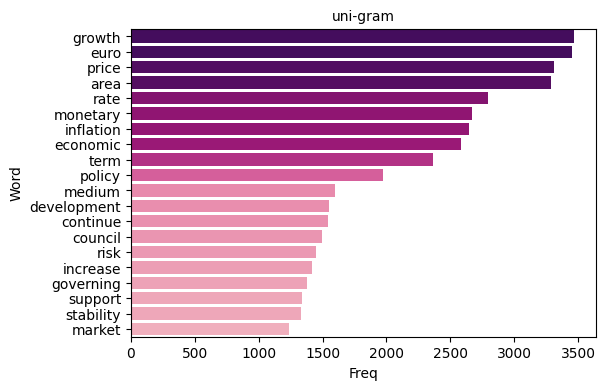

,Word,Freq
0,growth,3466
1,euro,3454
2,price,3313
3,area,3288
4,rate,2792
5,monetary,2668
6,inflation,2645
7,economic,2584
8,term,2366
9,policy,1973


In [5]:
plot_top_ngrams(speech["Joined_Tokens"], (1, 1), "uni-gram", n=20)

### Top TF-IDF

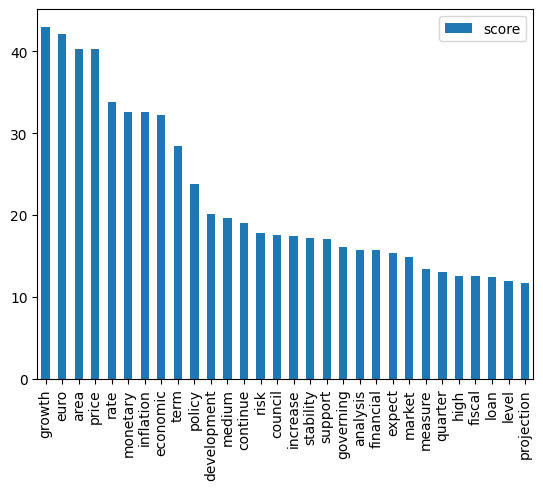

In [6]:
plot_topn_tfidf(speech['Joined_Tokens'],top_n=30, mode = "tf-idf")

In [7]:
texts = speech['Joined_Tokens']
df_docs_terms_corpus = DenseTfIdf(
    sublinear_tf=True,
                 lowercase=True,
                 stop_words='english'
                ).fit_transform(texts)

df_docs_terms_corpus.sum(axis=0).nlargest(n=30)

growth         16.528309
euro           16.429834
area           16.236228
price          15.781487
rate           15.442994
economic       15.210653
monetary       15.174514
inflation      14.808869
term           14.391733
policy         13.419624
medium         12.488630
development    12.402592
continue       12.336975
increase       11.889300
council        11.805580
risk           11.729265
analysis       11.727569
support        11.675842
governing      11.421087
stability      11.362772
expect         11.235042
market         10.949683
financial      10.859678
quarter        10.486638
fiscal         10.397905
outlook        10.160184
high           10.103668
measure        10.068055
level          10.032873
loan            9.834898
dtype: float64

### Word cloud

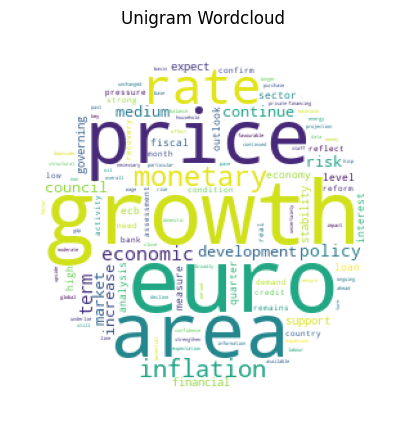

In [8]:
all_tokens = "".join(speech["Joined_Tokens"])
# Generate unigram word cloud
generate_wordcloud(all_tokens, ngram_type="unigram")

### Plots frequency of top words over time

In [9]:
important_words = ['price','rate','monetary', 'inflation', 'stability']

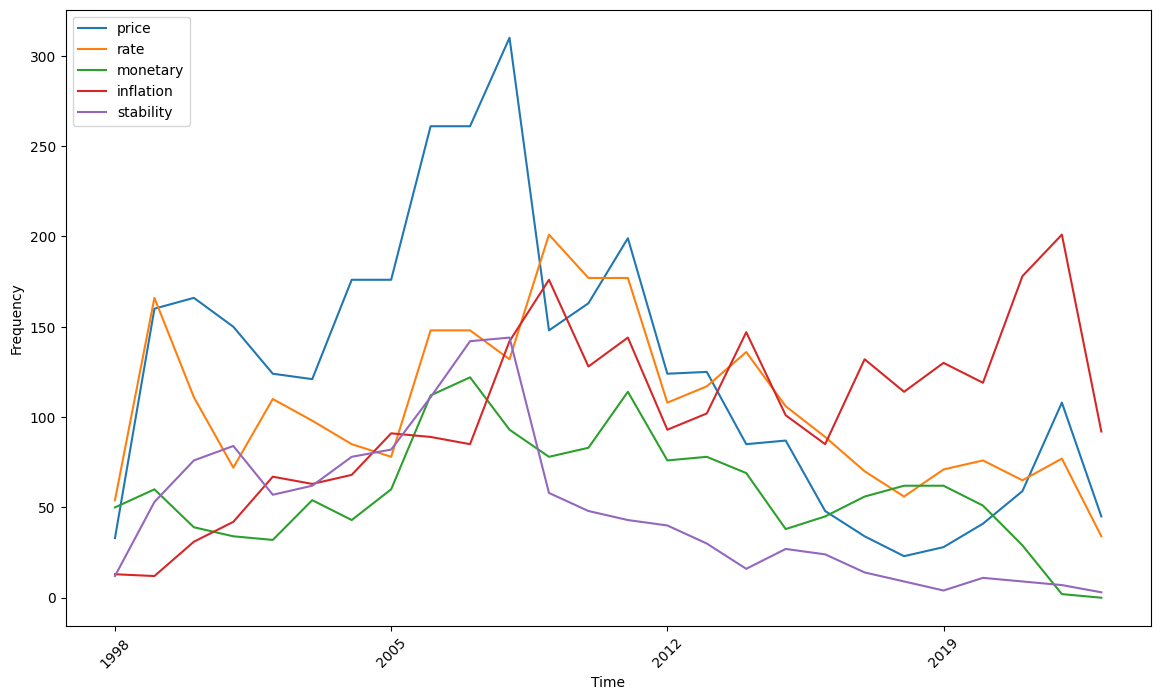

In [10]:
plot_topn_over_time(speech,'Year','Tokens', 'Joined_Tokens', important_words, n=10)

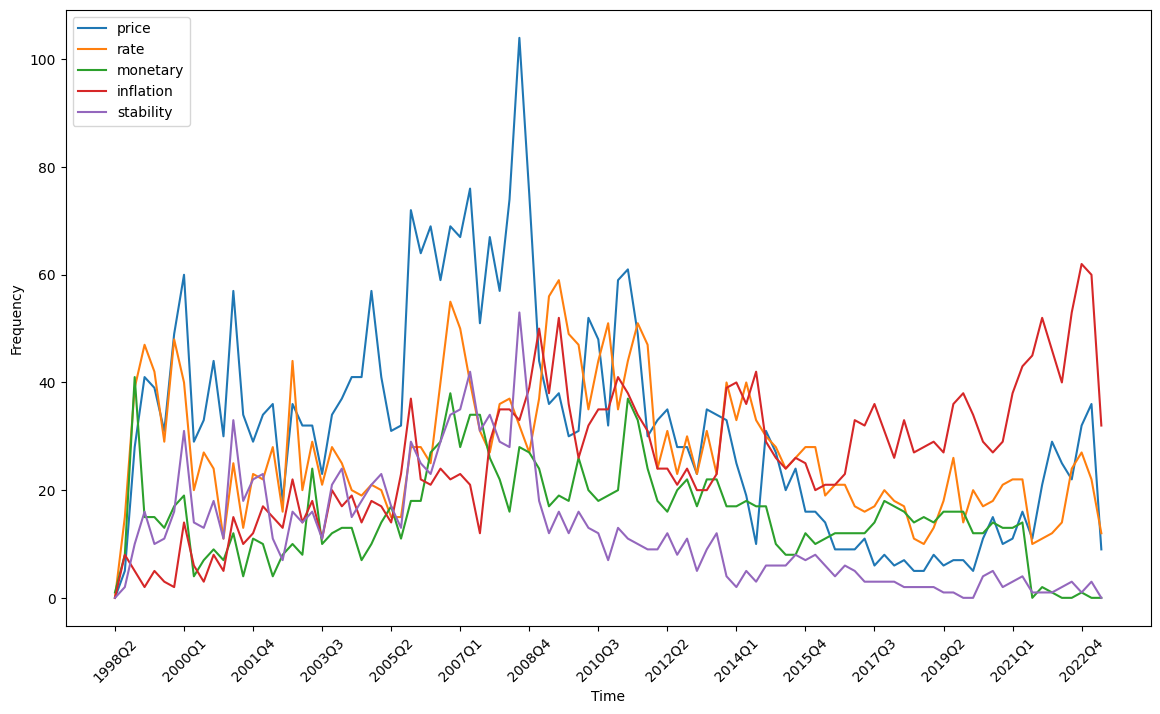

In [11]:
plot_topn_over_time(speech,'Quarter','Tokens', 'Joined_Tokens', important_words, n = 10)

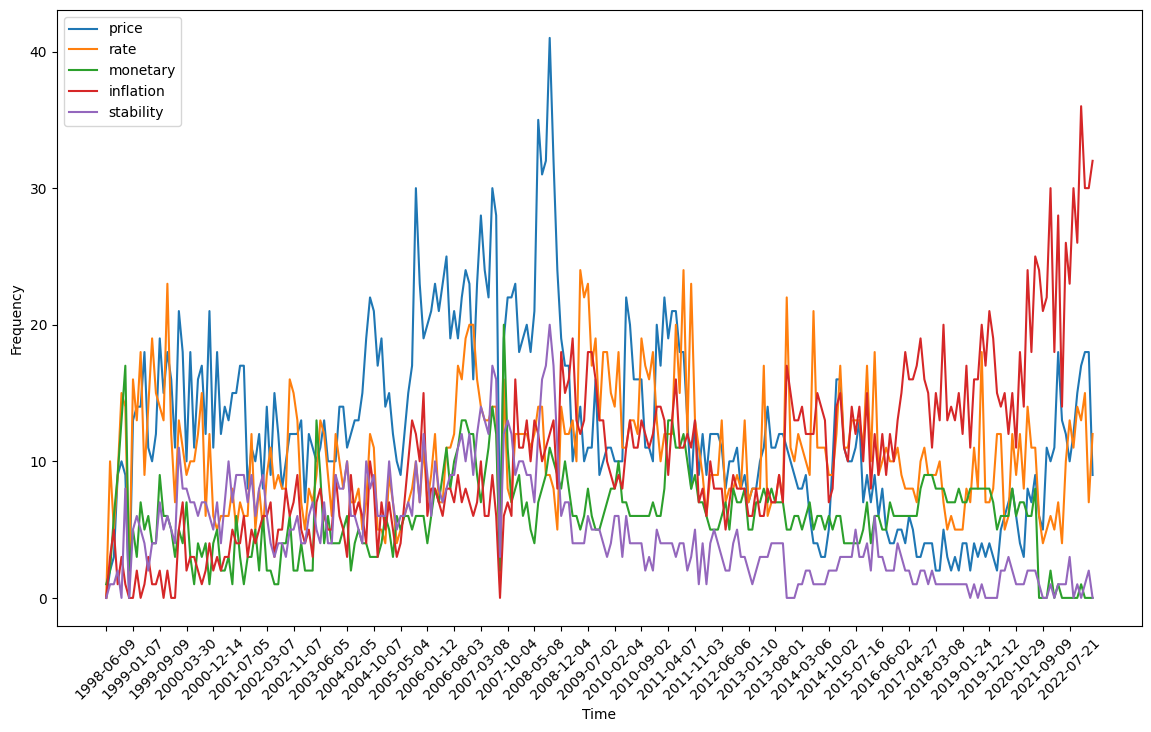

In [12]:
plot_topn_over_time(speech,'Date','Tokens', 'Joined_Tokens', important_words, n = 10)